# Implement Constant Proportion Portfolio Insurance (CPPI)

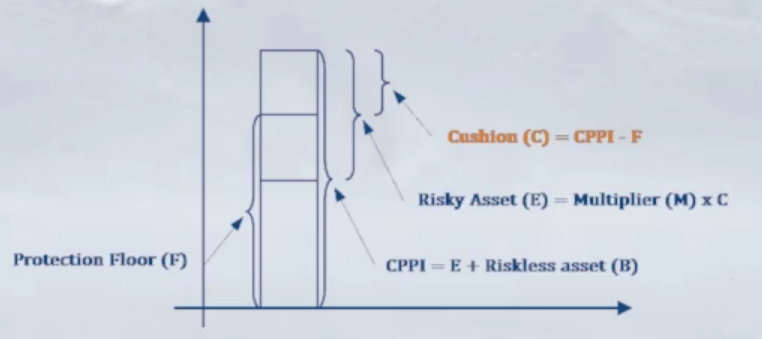

CPPI is a type of portfolio insurance in which the investor sets a floor on the dollar value of their portfolio, then structures asset allocation around the decision. The two asset classes used in CPPI are a risky asset and a conservative asset of either cash, equivalents or treary bonds. The percentage allocated to each depends on the "cusion" value, defined as current portfolio value minus floor value, and a multiplier coefficient, where a higher number denotes a more aggressive strategy.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import util_functions as f
import matplotlib.pyplot as plt
import numpy as np

# 1. Data Preparation

Load the 30 industry returns from Ken French data library.

In [2]:
rets = f.get_ffme_returns('30_Industry_Portfolios')
rets

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0191,-0.2379,0.0007,0.0187,-0.0002,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0797,...,0.0217,0.0202,0.0439,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.0447,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0230,...,0.0241,0.0225,0.0019,-0.0554,0.0007,-0.0787,0.0025,-0.0056,-0.0161,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0261,-0.1538,-0.0220,-0.0411,-0.0551,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0310,...,0.0163,0.0377,0.0364,0.0384,0.0161,0.0467,0.0652,0.0433,0.0234,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,0.0507,0.0088,0.0796,0.0540,0.0170,0.0630,0.0578,0.0644,0.0145,-0.0170,...,0.0121,0.0167,0.0146,0.0304,0.0245,-0.0121,0.0075,0.0547,0.0250,0.0610
2024-09,0.0097,0.0132,-0.0131,0.0422,-0.0234,0.0105,0.0576,-0.0181,0.0379,0.0163,...,0.0563,0.0353,0.0223,0.0087,0.0250,-0.0072,0.0409,0.0543,-0.0051,-0.0072
2024-10,-0.0530,-0.0515,0.0846,0.0377,0.0083,-0.0581,-0.0612,-0.0311,-0.0374,-0.1713,...,0.0236,-0.0040,0.0000,-0.0359,0.0137,-0.0158,-0.0096,-0.0064,0.0264,-0.0269


The 30 industries include the following:

In [3]:
rets.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

# 2. CPPI Implementation

## 2.1 Beer Industry

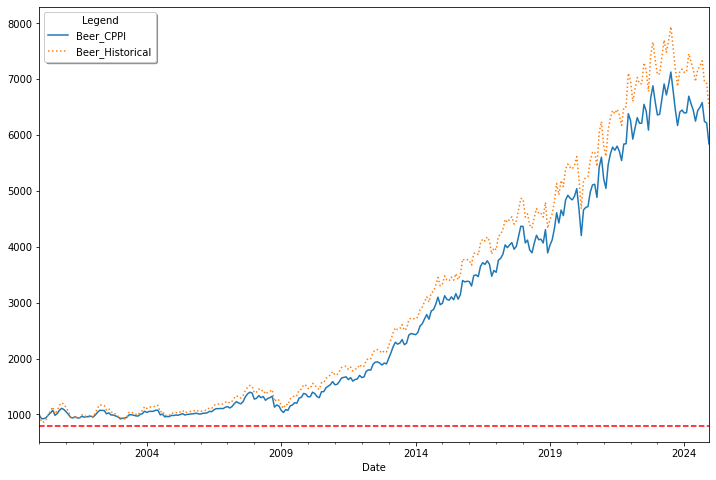

In [4]:
btr = f.run_cppi(rets["2000":][["Beer"]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03)
btr["Wealth"] = btr["Wealth"].add_suffix("_CPPI")
btr["Risky Wealth"] = btr["Risky Wealth"].add_suffix("_Historical")
fig, ax = plt.subplots(figsize=(12,8))
btr["Wealth"].plot(ax=ax, linestyle='-') 
btr["Risky Wealth"].plot(ax=ax,style=":")
plt.legend(title="Legend", loc="upper left", fontsize="medium", shadow=True)
ax.axhline(y=btr['floor']*btr['start'],color='r',linestyle='--')
plt.show()

If I just invested in Beer industry alone, the CPPI strategy will generate lower return, as there is certain allocation to the safe asset required.

In [5]:
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Beer_CPPI,7.4%,12.5%,-0.33,4.1,5.5%,7.7%,0.34,-25.9%


In [6]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Beer_Historical,7.9%,14.3%,-0.31,3.8,6.3%,9.0%,0.33,-27.1%


CPPI although generates a lower annualized return, has reduced the volatility, VaR and maximum drawdown. 

## 2.2 Steel Industry

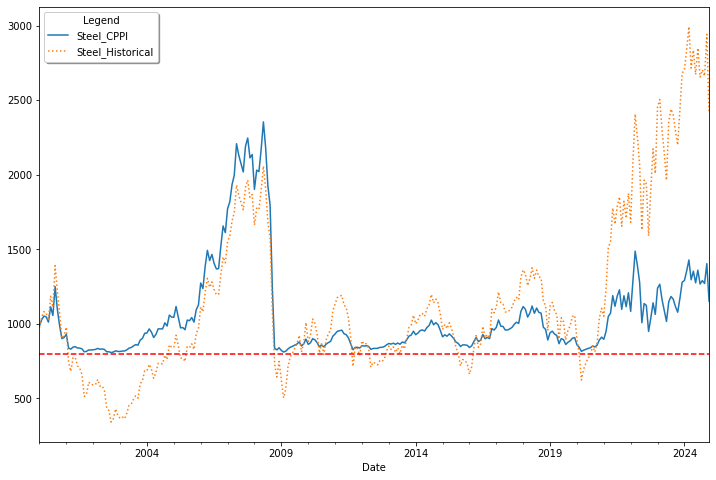

In [7]:
btr = f.run_cppi(rets["2000":][["Steel"]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03)
btr["Wealth"] = btr["Wealth"].add_suffix("_CPPI")
btr["Risky Wealth"] = btr["Risky Wealth"].add_suffix("_Historical")
fig, ax = plt.subplots(figsize=(12,8))
btr["Wealth"].plot(ax=ax, linestyle='-') 
btr["Risky Wealth"].plot(ax=ax,style=":")
plt.legend(title="Legend", loc="upper left", fontsize="medium", shadow=True)
ax.axhline(y=btr['floor']*btr['start'],color='r',linestyle='--')
plt.show()

If I just invested in Steel industry alone, CPPI strategy apparently has lower variation and will protect my portfolio above the floor value.

In [8]:
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel_CPPI,0.6%,20.1%,-0.99,9.7,10.0%,14.7%,-0.12,-65.6%


In [9]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel_Historical,3.7%,33.3%,-0.16,3.5,15.3%,21.0%,0.02,-75.5%


CPPI although generates a lower annualized return, has reduced the volatility, VaR and maximum drawdown.

## 2.3 Finance Industry

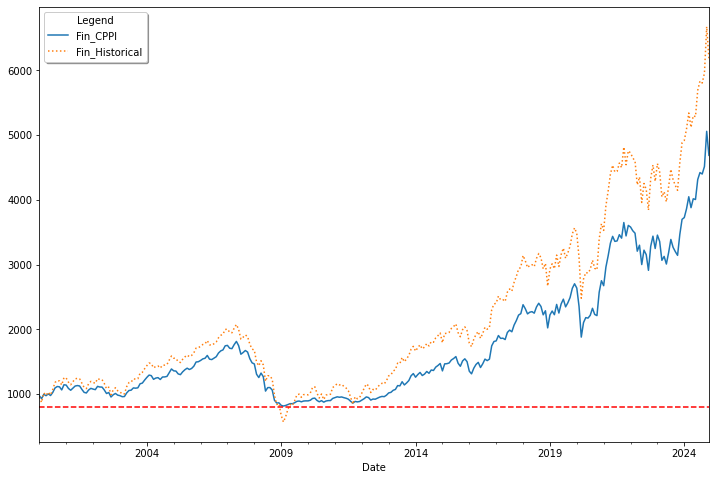

In [10]:
btr = f.run_cppi(rets["2000":][["Fin"]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03)
btr["Wealth"] = btr["Wealth"].add_suffix("_CPPI")
btr["Risky Wealth"] = btr["Risky Wealth"].add_suffix("_Historical")
fig, ax = plt.subplots(figsize=(12,8))
btr["Wealth"].plot(ax=ax, linestyle='-') 
btr["Risky Wealth"].plot(ax=ax,style=":")
plt.legend(title="Legend", loc="upper left", fontsize="medium", shadow=True)
ax.axhline(y=btr['floor']*btr['start'],color='r',linestyle='--')
plt.show()

If I just invested in Financial industry alone, CPPI strategy will generate lower return, but will protect the portfolio above the floor value.

In [11]:
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Fin_CPPI,6.5%,15.6%,-0.53,5.7,7.2%,10.5%,0.22,-55.0%


In [12]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Fin_Historical,7.8%,20.0%,-0.49,4.7,9.3%,13.4%,0.23,-72.6%


CPPI although generates a lower annualized return, has reduced the volatility, VaR and maximum drawdown.